# Problem statement
  In this notebook we will train our  cleaned prosper Loan data on a Knn Model by applying severeal hyperparameter tuning options  in order to reach the highest accuracy
  Then we will compare the different parameters combinations in order to find the best results

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


## Importing the cleaned CSV file

In [ ]:
link = 'https://drive.google.com/file/d/1HsRMSs2A120li2AZgvAtyqXHLaDAiSgn/view?usp=sharing'
 
import pandas as pd
 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('xclara.csv') 
 
df = pd.read_csv('xclara.csv')

## Importing the necessary libraries for the modelling

In [ ]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

## Splitting the Data into features (X) and labels (y) to be predicted 

In [ ]:
X= df.drop(columns=['ListingCreationDate', 'DateCreditPulled','FirstRecordedCreditLine','IncomeRange','LoanOriginationDate','target','ClosedDate'])
y = df['target']

## Splitting the Data into a training test (80% of the data) and a test set (20% of the data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

## Applying the KNN model on the Data
In this step we applied a wide range of K values in order to find the best ones for our current problem

In [ ]:
# calculating the accuracy of the model with different k values.
mean_acc = np.zeros(20)
for i in range(1,21):
    #Training the model and predicting the test results  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.84062641, 0.84513759, 0.85996004, 0.85654444, 0.86021783,
       0.85796223, 0.85950893, 0.85899336, 0.86047561, 0.85899336,
       0.86176452, 0.85944448, 0.86015338, 0.85892892, 0.86034672,
       0.85938003, 0.86124895, 0.85925114, 0.85950893, 0.8584778 ])

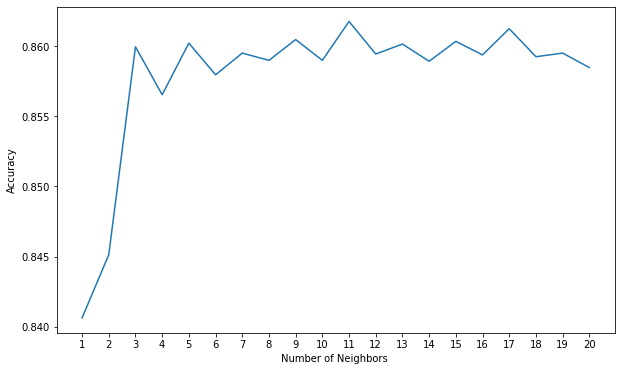

In [ ]:
#Plotting the accuracy scores according to each k value
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

## Applying GridSearchCV 
The Knn model usually dosen't have a lot of hyperparameters to be tuned. Therefore we used GridSearchCV without RandomizedSearchCV first to find the best parameters for our task while using the best k values obtained from the previous step

In [ ]:
# Creating the parameters Grid 
grid_params = { 'n_neighbors' : [9,11,17],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
# Applying GridSearchCV on our data
gs_knn = GridSearchCV(KNeighborsClassifier(),
                         param_grid = grid_params,
                         cv = 20,
                         verbose=True) #verbose to have outputs of what happening with GridSearchCV
# Fit grid hyperparameter search for LogisticRegression
gs_knn.fit(X_train,y_train)

Fitting 20 folds for each of 18 candidates, totalling 360 fits


GridSearchCV(cv=20, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [9, 11, 17],
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [ ]:
# Extracting the best parameters from the GridSearchCV model
gs_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

In [ ]:
# The test accuracy after using the best parameters
gs_knn.score(X_test,y_test)

0.8874138042147323

In [ ]:
# Trying a different k value to see if the accuracy improves
model = KNeighborsClassifier(metric='manhattan',n_neighbors= 10,weights='distance')
model.fit(X_train, y_train)
print('Training accuracy:', model.score(X_train, y_train))
print('Test accuracy:', model.score(X_test, y_test))
print('')


Training accuracy: 1.0
Test accuracy: 0.8903138493265451



Since changing the k value again improved the acc a little. I decided to hypertune the k values again to see if we can make it even better

### Hypertuning the n_neighbors parameter




In [ ]:
# Creating the parameters Grid 
grid_params = { 'n_neighbors' : [10,11,12,13,14]
               }

In [ ]:
# Testing with different k values and applying GridSearchCV on our data
gs_knn = GridSearchCV(KNeighborsClassifier(metric='manhattan',weights='distance'),
                         param_grid = grid_params,
                         cv = 5,
                         verbose=2,
                      n_jobs=-1) #verbose to have outputs of what happening with GridSearchCV
# Fit grid hyperparameter search for LogisticRegression
gs_knn.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(metric='manhattan',
                                            weights='distance'),
             n_jobs=-1, param_grid={'n_neighbors': [10, 11, 12, 13, 14]},
             verbose=2)

In [ ]:
# Extracting the best parameters from the GridSearchCV model
gs_knn.best_params_

{'n_neighbors': 10}

In [ ]:
# The test accuracy after using the best parameters
gs_knn.score(X_test,y_test)

0.8903138493265451